In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_reits()], 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-26 to 2019-06-06'

In [2]:
quote.statistics(21)

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
VNQ,50,1.356479,2.108707,0.559377,3.975014
KBWY,50,1.290423,2.441219,0.456127,5.638364
SCHH,50,0.976730,1.935372,0.413261,4.332364
SRET,50,0.593240,2.297448,0.181211,4.302225
VNQI,50,-0.001118,2.619353,-0.067969,4.665888
MORT,50,-0.030825,2.740756,-0.075797,7.025663
MRRL,50,-0.324216,5.342570,-0.093800,13.563406
REM,50,-0.125753,2.714083,-0.111518,7.076853
REML,50,-0.632590,5.825121,-0.138968,14.813703


In [6]:
quote.least_correlated_portfolio(21, 1)

['KBWY'] 0.953463926787514 0.0 1.4095909630046035 -0.45612703621708944
['SCHH'] 0.669830392097033 0.0 1.083090991423838 -0.413260599326805
['VNQ'] 0.4343766253078294 0.0 0.9937535146769443 -0.5593768893691149


['VNQ']

In [4]:
quote.least_correlated_portfolio(21, 2, ['VNQ'])

['VNQ', 'KBWY'] 2.6323932321369057 1.2445526800415623 2.403344477681548 -1.0155039255862044
['VNQ', 'SRET'] 2.4022022321320495 1.073480446870124 2.0693098342327407 -0.7405880489708154


['VNQ', 'SRET']

In [7]:
quote.setup_mask(['VNQ', 'SRET'])
quote.find_optimal_ratio(21, 1)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 VNQ     0.591987
 SRET    0.408013
 dtype: float64, 1.0451, 1.9218)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
VNQ,50.0,1.356479,2.108707,-2.311019,-0.126578,0.826831,3.017328,5.608280,0.559377,3.975014
Portfolio,50.0,1.041951,1.921989,-1.887134,-0.580401,0.749976,2.547217,5.510634,0.450072,2.781277
SRET,50.0,0.593240,2.297448,-3.606473,-1.243037,0.951728,2.465904,5.368013,0.181211,4.302225


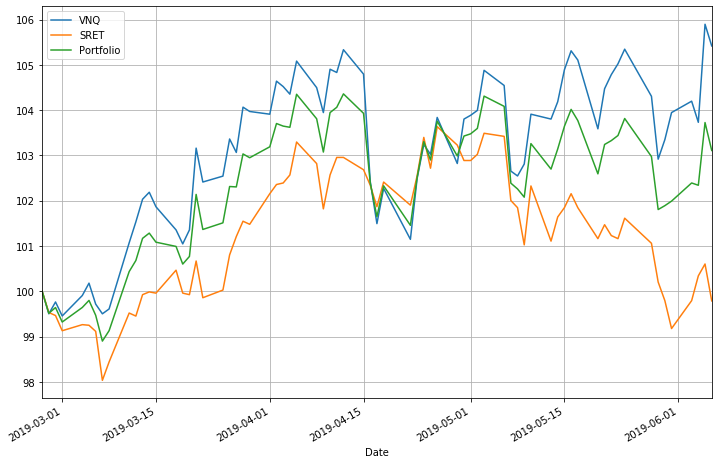

In [8]:
quote.graph(21, {'VNQ': .59, 'SRET': .41})